# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from dataloaders import get_mnist_dataloaders
train_loader, test_loader = get_mnist_dataloaders(batch_size=64, path_to_data='/home/data/bvaa')

### Define latent distribution of the model

In [2]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 10,
               'disc': [10]}

### Build a model

In [3]:
from models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32), use_cuda=True).cuda()

In [4]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Train the model

In [5]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [6]:
from training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity, use_cuda=True)

In [7]:
# Build a visualizer which will be passed to trainer to visualize progress during training
from visualize import Visualizer

viz = Visualizer(model)

In [8]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=10, save_training_gif=('./training.gif', viz))

0/60000	Loss: 641.004
3200/60000	Loss: 457.727
6400/60000	Loss: 288.575
9600/60000	Loss: 275.779
12800/60000	Loss: 271.650
16000/60000	Loss: 274.503
19200/60000	Loss: 271.731
22400/60000	Loss: 271.629
25600/60000	Loss: 272.618
28800/60000	Loss: 272.002
32000/60000	Loss: 268.881
35200/60000	Loss: 267.801
38400/60000	Loss: 267.617
41600/60000	Loss: 265.485
44800/60000	Loss: 265.394
48000/60000	Loss: 263.121
51200/60000	Loss: 262.307
54400/60000	Loss: 262.518
57600/60000	Loss: 261.393
Epoch: 1 Average loss: 279.68
0/60000	Loss: 262.967
3200/60000	Loss: 260.003
6400/60000	Loss: 258.202
9600/60000	Loss: 258.348
12800/60000	Loss: 257.569
16000/60000	Loss: 258.106
19200/60000	Loss: 255.690
22400/60000	Loss: 255.107
25600/60000	Loss: 254.309
28800/60000	Loss: 255.720
32000/60000	Loss: 252.451
35200/60000	Loss: 254.802
38400/60000	Loss: 254.728
41600/60000	Loss: 251.667
44800/60000	Loss: 250.463
48000/60000	Loss: 250.038
51200/60000	Loss: 250.868
54400/60000	Loss: 249.529
57600/60000	Loss: 249.

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Epoch: 10 Average loss: 197.41


### Visualize

In [10]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [12]:
example_data.shape, example_targets.shape

(torch.Size([64, 1, 32, 32]), torch.Size([64]))

In [59]:
example_img = example_data[0,:,:,:].unsqueeze(0).cuda()
output, l_dist = model(example_img)

In [66]:
l_sample = model.reparameterize(l_dist)
new_l_sample = l_sample

In [82]:
new_l_sample = l_sample
new_l_sample[0][6] = 100

In [83]:
new_output = model.decode(l_sample)

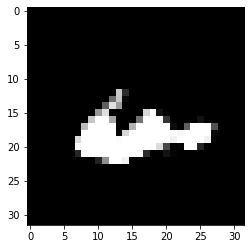

In [84]:
plt.imshow(new_output[0][0].detach().cpu().numpy(), cmap='gray', interpolation='none')

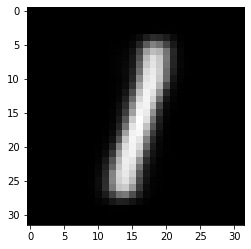

In [64]:
plt.imshow(output[0][0].detach().cpu().numpy(), cmap='gray', interpolation='none')

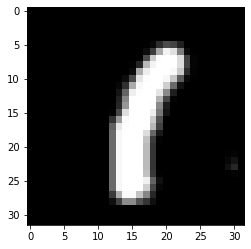

In [65]:
plt.imshow(example_img[0][0].detach().cpu().numpy(), cmap='gray', interpolation='none')

In [9]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt

# Get a batch of data
for batch, labels in test_loader:
    break

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

plt.imshow(recon.numpy()[0, :, :], cmap='gray')

/home/ujjwal/Desktop/BVAA/experiments/bvaa/JointVAE/visualize.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
# Plot samples
samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

In [ ]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

In [ ]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')